<a href="https://colab.research.google.com/github/meetgandhi123/PyTorch-Basic-Concepts/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch: 10, Loss: 4385.9248
Epoch: 20, Loss: 3272.1440
Epoch: 30, Loss: 2466.3157
Epoch: 40, Loss: 1882.6694
Epoch: 50, Loss: 1459.5247
Epoch: 60, Loss: 1152.4628
Epoch: 70, Loss: 929.4490
Epoch: 80, Loss: 767.3515
Epoch: 90, Loss: 649.4462
Epoch: 100, Loss: 563.6285


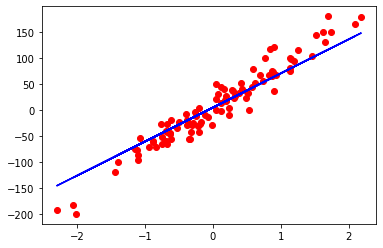

In [3]:
import torch
import torch.nn as nn

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Data Generation
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(-1,1)

n_samples, n_features = x.shape

# Model
input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

# Loss and Optimizaion
lr=0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Training loop
num_epoch = 100

for epoch in range(num_epoch):
    # Forward and loss
    y_pred = model(x)
    loss = criterion(y_pred,y)

    # Backward
    loss.backward()

    # Weight Update
    optimizer.step()

    # Empty gradients
    optimizer.zero_grad()

    if (epoch+1)%10 ==0:
        print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')

# plot
predicted = model(x).detach()

plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')

plt.show()